In [22]:
# IMPORTS
import numpy as np
from numpy import around
import matplotlib as mpl
#mpl.use('TKAgg')
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Rectangle, Circle
from matplotlib.gridspec import GridSpec
import os



class Animation():
    '''
    Provides animation capabilities.
    
    Given a callable function that draws an image of the system state and smiulation data
    this class provides a method to created an animated representation of the system.
    
    
    Parameters
    ----------
    
    drawfnc : callable
        Function that returns an image of the current system state according to :attr:`simdata`
    
    simdata : numpy.ndarray
        Array that contains simulation data (time, system states, input states)
    
    plotsys : list
        List of tuples with indices and labels of system variables that will be plotted along the picture
    
    plotinputs : list
        List of tuples with indices and labels of input variables that will be plotted along the picture
    '''
    
    def __init__(self, drawobj, simdata, plotsys=[], plotinputs=[]):
        
        self.fig = plt.figure()
    
        self.t = simdata[0]
        self.xt = simdata[1]
        self.ut = simdata[2]
        
        self.plotsys = plotsys
        self.plotinputs = plotinputs
        self.drawobj = drawobj
        self.get_axes()
        
        
        self.nframes = len(self.t)
        
        
        #other Configs
        self.axes['ax_anim'].set_frame_on(True)
        self.axes['ax_anim'].set_aspect('equal')
        self.axes['ax_anim'].set_facecolor('w')


    # Defining required axis
    def get_axes(self):
        sys = self.plotsys
        inputs = self.plotinputs
        
        if not sys+inputs:
            gs = GridSpec(1,1)
        else:
            l = len(sys+inputs)
            
            gs = GridSpec(l, 3)
        axes = dict()
        syscurves = []
        inputcurves = []
        
        if not sys+inputs:
            axes['ax_anim'] = self.fig.add_subplot(gs[:,:])
        else:
            axes['ax_anim'] = self.fig.add_subplot(gs[:,1:])
        

        for i in range(len(sys)):
            axes['ax_x{}'.format(i)] = self.fig.add_subplot(gs[i,0])
            
        
        lensys = len(sys)
        for i in range(len(inputs)):
            axes["ax_x{}".format(i)] = self.fig.add_subplot(gs[lensys+i,0])
        
        self.axes = axes
        self.syscurves = syscurves
        self.inputcurves = inputcurves

        shape_dict={}
        #Checking the desired patches , lines , curves
    
        for i, name in self.drawobj :

            shape=0
            size=1
            position=2
            color=3
            init_pos=0
            recNumber=0
            cirNumber=0
            lineNumber=0
            curvNumber=0
            if self.drawobj[name][shape] == 'Rectangle':
                
                recNumber+=1
                rec_pos=self.drawobj[name][position](init_pos)
                rec_width=self.drawobj[name][size][0]
                rec_height=self.drawobj[name][size][1]
                face_color=self.drawobj[name][color]

                shape_dict['rec{}'.format(recNumber)]= Rectangle(
                rec_pos,
                rec_width,
                rec_height,
                facecolor=face_color,
                linwidth=0.2
                )
                axes['ax_anim'].add_patch( shape_dict['rec{}'.format(recNumber)])


            elif self.drawobj[name][shape]=='Circle' :
                cirNumber+=1
                radios=self.drawobj[name][size]
                face_color=self.drawobj[name][color]
                shape_dict['Cir{}'.format(cirNumber)]=Circle(init_pos, radios,facecolor=face_color )
                axes['ax_anim'].add_patch(shape_dict['Cir{}'.format(cirNumber)])

            elif self.drawobj[name][shape]=='Line' :
                lineNumber+=1
                shape_dict['line{}'.format(lineNumber)], =axes['ax_anim'].plot([], [], lw=2, marker='o', markersize=8)

            elif self.drawobj[name][shape]=='Curve' :
                curvNumber+=1
                curve_color=self.drawobj[name][color]
                shape_dict['curve{}'.format(curvNumber)]= axes['ax_anim'].plot([], [], lw=2, color=curve_color)



             







    def __init(self):
        pass


    def __anim(self, frame):
        pass


        

           

In [43]:
t=np.array(np.linspace(0,9,10))
x1=np.array(np.linspace(20,29,10))
x2=np.array(np.linspace(30,39,10))
simdata=[t, x1, x2]
def posrec(t):
   return (8,8)


In [64]:
drawobj={'cart':['Rectangl', (.6,.6), posrec ,'black']}

In [66]:
plotsys=[(0,'x'), (2,'y')]

ValueError: too many values to unpack (expected 2)

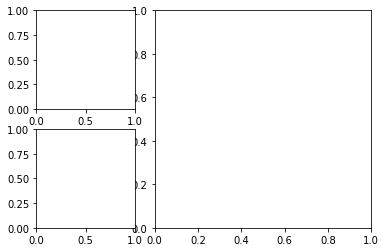

In [68]:
A=Animation(drawobj, simdata, plotsys)